In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score
from catboost import CatBoostClassifier
import time
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, RandomizedSearchCV, GridSearchCV
import xgboost as xg

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df1 = df.copy()

In [5]:
df1 = df1.drop(labels=["CustomerId", "Surname", "Geography", "Gender"], axis=1)

In [6]:
df1

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,42,2,0.00,1,1,1,101348.88,1
1,2,608,41,1,83807.86,1,0,1,112542.58,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1
3,4,699,39,1,0.00,2,0,0,93826.63,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,772,42,3,75075.31,2,1,0,92888.52,1


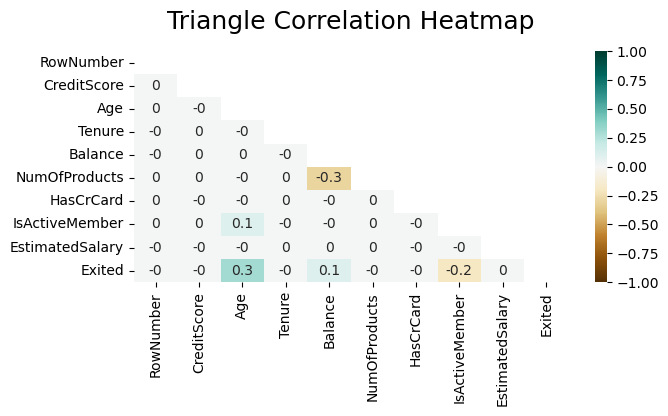

In [7]:
plt.figure(figsize=(7, 3))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
heatmap = sns.heatmap(round(df1.corr(),1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df = df.drop(labels=["CustomerId", "Surname", "RowNumber"], axis=1)

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

# Data Categorization by using Quantile-based discretization function

In [12]:
df['EstimatedSalary'] = pd.qcut(df['EstimatedSalary'], q=6, labels=['very low', 'low', 'medium', 'high', 'very high', 'very very high'])

In [13]:
bin_labels_balance = ['low', 'medium', 'high', 'very high']

df['Balance'] = pd.qcut(df['Balance'], q=6, labels=bin_labels_balance, duplicates='drop')

In [14]:
df['Age'] = pd.qcut(df['Age'], q=3, labels = ['young', 'adult', 'old'], duplicates='drop')

In [15]:
df['CreditScore'] = pd.qcut(df['CreditScore'], q=3, labels = ['low', 'medium', 'high'], duplicates='drop')

In [16]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,medium,France,Female,old,2,low,1,1,1,high,1
1,low,Spain,Female,adult,1,low,1,0,1,high,0
2,low,France,Female,old,8,very high,3,1,0,high,1
3,high,France,Female,adult,1,low,2,0,0,medium,0
4,high,Spain,Female,old,2,high,1,1,1,medium,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,high,France,Male,adult,5,low,2,1,0,medium,0
9996,low,France,Male,adult,10,low,1,1,1,high,0
9997,high,France,Female,adult,7,low,1,0,1,low,1
9998,high,Germany,Male,old,3,low,2,1,0,medium,1


In [17]:
df.nunique()

CreditScore         3
Geography           3
Gender              2
Age                 3
Tenure             11
Balance             4
NumOfProducts       4
HasCrCard           2
IsActiveMember      2
EstimatedSalary     6
Exited              2
dtype: int64

## Label Encoding 

In [18]:
label_encoder = LabelEncoder() 
  
df['Age']= label_encoder.fit_transform(df['Age'])
df['Balance']= label_encoder.fit_transform(df['Balance'])
df['EstimatedSalary']= label_encoder.fit_transform(df['EstimatedSalary'])
df['Geography']= label_encoder.fit_transform(df['Geography'])
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [19]:
df['CreditScore']= label_encoder.fit_transform(df['CreditScore'])

## Dividing data to train and test sets 

In [20]:
y = df['Exited']
X = df.drop(['Exited'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=42)

## Data Normalization 

In [21]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Voting Classifier - choose the model with best performance

In [23]:
from sklearn.calibration import CalibratedClassifierCV

model = CatBoostClassifier()
parameters = {'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]
              }

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1, return_train_score=True)

model1 = RandomForestClassifier()
model2 = LogisticRegression()
model3 = SVC(probability=True)
model4 = grid
model5 = SGDClassifier(loss = 'log_loss')

In [24]:
voting_classifier = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('svc', model3), 
                                                 ('Grid', grid), ('sgd', model5)], voting='soft')

In [25]:
voting_classifier.fit(X_train_scaled, y_train)

0:	learn: 0.6883071	total: 141ms	remaining: 14s
1:	learn: 0.6835685	total: 148ms	remaining: 7.26s
2:	learn: 0.6786813	total: 156ms	remaining: 5.04s
3:	learn: 0.6740380	total: 161ms	remaining: 3.87s
4:	learn: 0.6693693	total: 168ms	remaining: 3.18s
5:	learn: 0.6647679	total: 174ms	remaining: 2.72s
6:	learn: 0.6602960	total: 181ms	remaining: 2.4s
7:	learn: 0.6560112	total: 187ms	remaining: 2.15s
8:	learn: 0.6518226	total: 194ms	remaining: 1.96s
9:	learn: 0.6478183	total: 200ms	remaining: 1.8s
10:	learn: 0.6436218	total: 206ms	remaining: 1.67s
11:	learn: 0.6398143	total: 214ms	remaining: 1.57s
12:	learn: 0.6359823	total: 217ms	remaining: 1.45s
13:	learn: 0.6320862	total: 223ms	remaining: 1.37s
14:	learn: 0.6286229	total: 227ms	remaining: 1.29s
15:	learn: 0.6246567	total: 233ms	remaining: 1.22s
16:	learn: 0.6207670	total: 241ms	remaining: 1.18s
17:	learn: 0.6172883	total: 246ms	remaining: 1.12s
18:	learn: 0.6135729	total: 255ms	remaining: 1.09s
19:	learn: 0.6099344	total: 263ms	remaining: 

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('lr', LogisticRegression()),
                             ('svc', SVC(probability=True)),
                             ('Grid',
                              GridSearchCV(cv=2,
                                           estimator=<catboost.core.CatBoostClassifier object at 0x000002143DC92050>,
                                           n_jobs=-1,
                                           param_grid={'depth': [6, 8, 10],
                                                       'iterations': [30, 50,
                                                                      100],
                                                       'learning_rate': [0.01,
                                                                         0.05,
                                                                         0.1]},
                                           return_train_score=True)),
                             ('sgd', SGDClassifier(loss='log_loss'))],
                 voting='soft')

In [26]:
y_train_vote = voting_classifier.predict(X_train) 
y_test_vote = voting_classifier.predict(X_test) 

In [27]:
print("Training ROC-AUC: ", roc_auc_score(y_train, y_train_vote)) 
print("Validation ROC-AUC: ", roc_auc_score(y_test, y_test_vote))

Training ROC-AUC:  0.4808807586830996
Validation ROC-AUC:  0.47704619262735715


In [28]:
def report(classifier):    
    y_pred = classifier.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    conf_m = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy}")

    print(f"Classification Report:")
    print(report)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=classifier.classes_)
    disp.plot()
    plt.show()

Accuracy: 0.845
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1607
           1       0.79      0.29      0.42       393

    accuracy                           0.84      2000
   macro avg       0.82      0.63      0.67      2000
weighted avg       0.84      0.84      0.81      2000



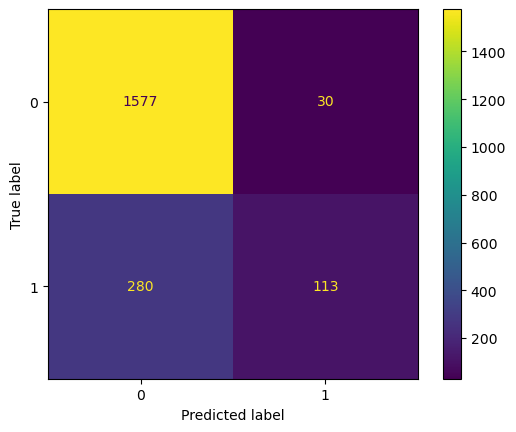

In [29]:
report(voting_classifier)

# 

In [30]:
k_folds = KFold(n_splits = 5)

scores_vot = cross_val_score(voting_classifier, X_train_scaled, y_train, cv = k_folds)

0:	learn: 0.6478271	total: 8.5ms	remaining: 416ms
1:	learn: 0.6096761	total: 16ms	remaining: 383ms
2:	learn: 0.5798943	total: 26.6ms	remaining: 417ms
3:	learn: 0.5518928	total: 33.5ms	remaining: 385ms
4:	learn: 0.5269363	total: 38.9ms	remaining: 350ms
5:	learn: 0.5062004	total: 44ms	remaining: 322ms
6:	learn: 0.4886732	total: 49.8ms	remaining: 306ms
7:	learn: 0.4750070	total: 53.9ms	remaining: 283ms
8:	learn: 0.4611701	total: 60.7ms	remaining: 277ms
9:	learn: 0.4524068	total: 63.7ms	remaining: 255ms
10:	learn: 0.4405210	total: 69.6ms	remaining: 247ms
11:	learn: 0.4310278	total: 73.4ms	remaining: 233ms
12:	learn: 0.4214529	total: 79.5ms	remaining: 226ms
13:	learn: 0.4135016	total: 86ms	remaining: 221ms
14:	learn: 0.4075466	total: 89.8ms	remaining: 210ms
15:	learn: 0.4021247	total: 93.7ms	remaining: 199ms
16:	learn: 0.3968197	total: 98.6ms	remaining: 191ms
17:	learn: 0.3924609	total: 105ms	remaining: 187ms
18:	learn: 0.3879968	total: 110ms	remaining: 180ms
19:	learn: 0.3842648	total: 116

47:	learn: 0.5376785	total: 198ms	remaining: 214ms
48:	learn: 0.5354662	total: 210ms	remaining: 219ms
49:	learn: 0.5333783	total: 216ms	remaining: 216ms
50:	learn: 0.5316268	total: 223ms	remaining: 214ms
51:	learn: 0.5297263	total: 227ms	remaining: 210ms
52:	learn: 0.5276640	total: 241ms	remaining: 213ms
53:	learn: 0.5255280	total: 247ms	remaining: 211ms
54:	learn: 0.5235628	total: 253ms	remaining: 207ms
55:	learn: 0.5214643	total: 260ms	remaining: 204ms
56:	learn: 0.5193991	total: 265ms	remaining: 200ms
57:	learn: 0.5173189	total: 271ms	remaining: 196ms
58:	learn: 0.5154747	total: 277ms	remaining: 193ms
59:	learn: 0.5136484	total: 283ms	remaining: 189ms
60:	learn: 0.5117462	total: 289ms	remaining: 185ms
61:	learn: 0.5100023	total: 294ms	remaining: 180ms
62:	learn: 0.5082106	total: 300ms	remaining: 176ms
63:	learn: 0.5065857	total: 305ms	remaining: 172ms
64:	learn: 0.5049160	total: 310ms	remaining: 167ms
65:	learn: 0.5031356	total: 315ms	remaining: 162ms
66:	learn: 0.5016541	total: 320

In [31]:
print("Cross Validation Scores: ", scores_vot)
print("Average CV Score: ", scores_vot.mean())
print("Number of CV Scores used in Average: ", len(scores_vot))

Cross Validation Scores:  [0.850625 0.819375 0.860625 0.841875 0.8425  ]
Average CV Score:  0.843
Number of CV Scores used in Average:  5


## Before Classification

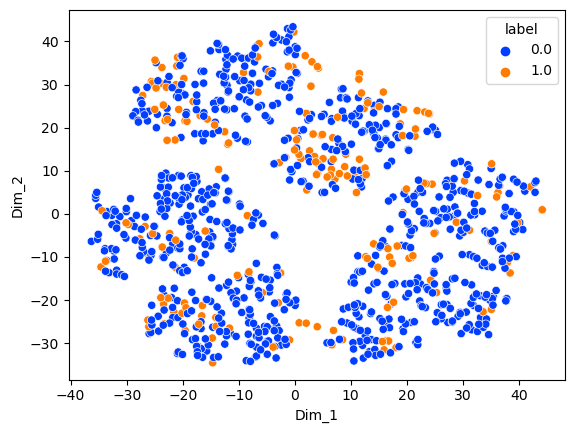

In [32]:
data_1000 = X_train_scaled[0:1000, :]
labels_1000 = y_train.iloc[0:1000]

# Применение t-SNE
model_tsne = TSNE(n_components=2, random_state=0, init='random')
tsne_data = model_tsne.fit_transform(data_1000)

# Создание нового DataFrame для визуализации
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Визуализация результатов t-SNE
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.show()

## After Classification

In [33]:
def TSNE_plot(model_clf, text):
    model_svm_linear = model_clf
    model_svm_linear.fit(data_1000, labels_1000)

    # Get the model's predictions or transformed features (replace with your features)
    transformed_data = model_svm_linear.predict_proba(data_1000)

    # Configure and fit t-SNE with init="random"
    tsne_model = TSNE(n_components=2, random_state=0, init='random')
    tsne_data = tsne_model.fit_transform(transformed_data)

    # Create a new DataFrame for the result
    tsne_data = np.vstack((tsne_data.T, labels_1000)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

    # Plotting the result of t-SNE
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(text)
    plt.legend()
    plt.show()

0:	learn: 0.6536427	total: 1.72ms	remaining: 171ms
1:	learn: 0.6236512	total: 4.25ms	remaining: 208ms
2:	learn: 0.5944076	total: 5.77ms	remaining: 186ms
3:	learn: 0.5710120	total: 7.38ms	remaining: 177ms
4:	learn: 0.5459003	total: 9.03ms	remaining: 172ms
5:	learn: 0.5269653	total: 10.8ms	remaining: 169ms
6:	learn: 0.5112518	total: 12.7ms	remaining: 169ms
7:	learn: 0.4958513	total: 14.5ms	remaining: 166ms
8:	learn: 0.4812011	total: 16.4ms	remaining: 166ms
9:	learn: 0.4698053	total: 18.1ms	remaining: 163ms
10:	learn: 0.4588604	total: 20.1ms	remaining: 162ms
11:	learn: 0.4479508	total: 21.9ms	remaining: 161ms
12:	learn: 0.4401108	total: 23.8ms	remaining: 159ms
13:	learn: 0.4310974	total: 26.1ms	remaining: 160ms
14:	learn: 0.4232331	total: 28.1ms	remaining: 159ms
15:	learn: 0.4149504	total: 29.9ms	remaining: 157ms
16:	learn: 0.4074028	total: 31.8ms	remaining: 155ms
17:	learn: 0.4024833	total: 33.6ms	remaining: 153ms
18:	learn: 0.3980627	total: 35.6ms	remaining: 152ms
19:	learn: 0.3946885	t

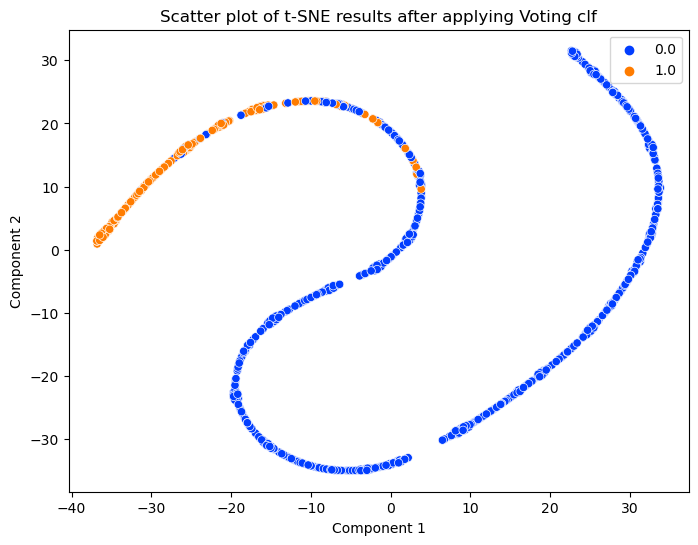

In [34]:
TSNE_plot(voting_classifier, 'Scatter plot of t-SNE results after applying Voting clf')

## XGBoost

In [35]:
xgb_clf = xg.XGBClassifier()

In [36]:
xg_params_rand = {
    'booster': ['gbtree'],
    'min_child_weight': [1, 10, 20, 30, 40, 50, 100],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5],
    'n_estimators': [10, 20, 30, 40, 50]
}

In [39]:
xg_rand = RandomizedSearchCV(estimator=xgb_clf,
                       param_distributions=xg_params_rand,
                       cv=10,
                       n_jobs=-1,
                       return_train_score=True)

In [40]:
import time
start_time = time.time()
xg_rand_fit = xg_rand.fit(X_train_scaled, y_train) 
  
y_pred = xg_rand.predict(X_test_scaled) 

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 16.500407934188843 seconds


In [41]:
k_folds = KFold(n_splits = 10)

scores_xgb = cross_val_score(xg_rand, X_train_scaled, y_train, cv = k_folds)

In [42]:
print("Cross Validation Scores: ", scores_xgb)
print("Average CV Score: ", scores_xgb.mean())
print("Number of CV Scores used in Average: ", len(scores_xgb))

Cross Validation Scores:  [0.8575  0.86    0.83875 0.845   0.87125 0.87    0.85625 0.82125 0.8425
 0.855  ]
Average CV Score:  0.85175
Number of CV Scores used in Average:  10


In [43]:
test_score = xg_rand.score(X_test_scaled, y_test)
print(f'Test set score: {test_score}')

Test set score: 0.85


Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1607
           1       0.68      0.44      0.54       393

    accuracy                           0.85      2000
   macro avg       0.78      0.70      0.72      2000
weighted avg       0.84      0.85      0.84      2000



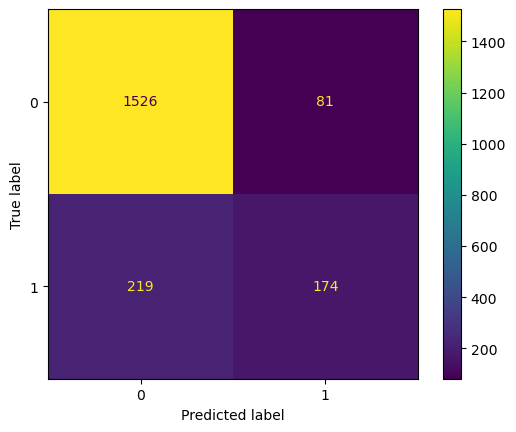

In [44]:
report(xg_rand)

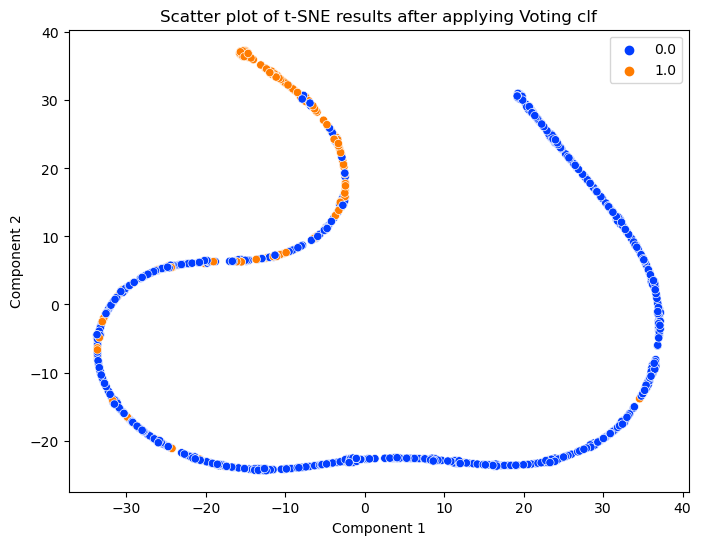

In [50]:
TSNE_plot(xg_rand, 'Scatter plot of t-SNE results after applying Voting clf')